Nesse projeto, analisarei um tema que ocorre muito frequentemente com quem vem de outro estado para o Distrito Federal, que é as pessoas acharem que os motoristas daqui não dirigem tão bem.

Para comprovar a veracidade ou falsidade desse fato, muitas variáveis entram em questão, mas como só alguns dados públicos de trânsito estão disponíveis,<br> irei analisar em vista da quantidade de acidentes em cada estado. Utilizando o Registro Nacional de Acidentes e Estatísticas de Trânsito de 01/2020 até 12/2022, publicado pelo Senatran e disponível no link:<br>
https://www.gov.br/transportes/pt-br/assuntos/transito/conteudo-Senatran/registro-nacional-de-acidentes-e-estatisticas-de-transito.

Como utilizarei as informações de um só banco de dados, e não analisarei tantas variáveis assim, as conclusões podem ser alteradas e muitas dessas conclusões podem não condizer com a verdade vista na prática.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
datag = pd.read_csv('acidentes.csv', delimiter = ';', low_memory = False)


In [ ]:
datag = datag.reset_index(drop = True)
for i in range(len(datag['dia_semana'])):
    for j in range(len(datag['dia_semana'][i])):
        if (datag['dia_semana'][i][j] == '-'):
            datag['dia_semana'][i] = datag['dia_semana'][i][0:j]
            break
        
print(datag['dia_semana'].head())

Após lermos o arquivo CSV baixado no link, escolheremos os estados que serão utilizados como comparativo, já que é uma atividade extensa e pouco produtiva comparar <br>
todos os estados do Brasil. 

Para isso escolhi 4 estados, o Distrito Federal que é alvo da pesquisa, Goiás que é um estado de grande magnitude e importância rodoviária <br>
situado no Centro-Oeste, Minas Gerais por ser o estado do Brasil com maior número de acidentes por ano e São Paulo por ser o estado com maior população e maior número <br>
de veículos automóveis.

Aqui também decidi por eliminar algumas colunas que não serão de grande utilidade para a nossa análise já que as mesmas possuem muitas células vazias.

In [16]:
estados = ['DF', 'SP', 'MG', 'GO']
filtered = datag[datag['uf_acidente'].isin(estados)]


columns_to_drop = ['latitude_acidente','longitude_acidente','ind_guardrail', 'ind_acostamento', 'lim_velocidade','bairro_acidente','end_acidente','cep_acidente', 'tp_pavimento','tp_acidente', 'tp_cruzamento', 'chv_localidade']

filtered = filtered.drop(columns=columns_to_drop)
datag = datag.drop(columns = columns_to_drop)


In [18]:

print(filtered.isnull().sum())

print(datag.isnull().sum())

num_acidente            0
data_acidente           0
uf_acidente             0
ano_acidente            0
mes_acidente            0
mes_ano_acidente        0
codigo_ibge             0
dia_semana              0
fase_dia                0
cond_meteorologica      0
num_end_acidente        0
km_via_acidente         0
hora_acidente           0
tp_rodovia              0
cond_pista              0
tp_curva                0
tp_pista                0
ind_cantcentral         0
qtde_acidente           0
qtde_acid_com_obitos    0
qtde_envolvidos         0
qtde_feridosilesos      0
qtde_obitos             0
dtype: int64
num_acidente            0
data_acidente           0
uf_acidente             0
ano_acidente            0
mes_acidente            0
mes_ano_acidente        0
codigo_ibge             0
dia_semana              0
fase_dia                0
cond_meteorologica      0
num_end_acidente        0
km_via_acidente         0
hora_acidente           0
tp_rodovia              0
cond_pista              0

 Transformando as colunas de data nos dois dataframes presentes para datetime, de forma que possamos utilizar as datas de forma cronológica,<br>
 sem termos que tratar strings.
 
 Criando também as colunas "ano" e "mes".

In [19]:
filtered['data_acidente'] = pd.to_datetime(filtered['data_acidente'])
filtered['ano'] = filtered['data_acidente'].dt.year
filtered['mes'] = filtered['data_acidente'].dt.month

datag['data_acidente'] = pd.to_datetime(datag['data_acidente'])
datag['ano'] = datag['data_acidente'].dt.year
datag['mes'] = datag['data_acidente'].dt.month

In [20]:
filtered = filtered[~filtered['ano'].isin([2018, 2019, 2023])]

datag = datag[~datag['ano'].isin([2018, 2019, 2023])]
datag.head()


,num_acidente,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,cond_meteorologica,...,tp_curva,tp_pista,ind_cantcentral,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos,ano,mes
8823,1340336,2020-01-15,AC,2020,1,12020,1200401,QUARTA-FEIRA,TARDE,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8824,4420534,2020-01-19,AC,2020,1,12020,1200302,DOMINGO,MANHA,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8825,3756210,2020-01-24,AC,2020,1,12020,1200401,SEXTA-FEIRA,TARDE,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8826,4538411,2020-01-27,AC,2020,1,12020,1200401,SEGUNDA-FEIRA,MANHA,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8827,654342,2020-01-02,AC,2020,1,12020,1200401,QUINTA-FEIRA,TARDE,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1


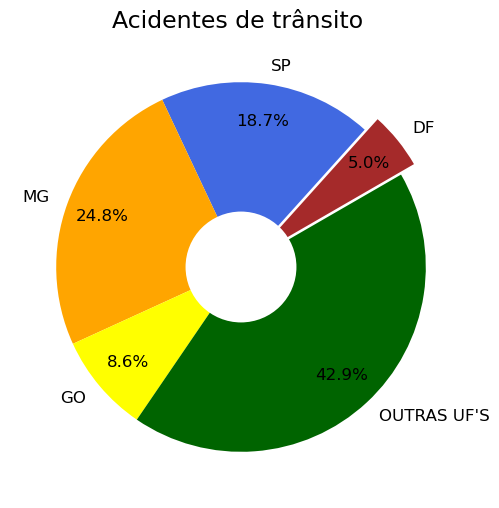

In [21]:
def mautopct(values):
    def sub(pct):
        total = sum(values)
        val = int(round(pct * total / 100))
        return '{p:.1f}%'.format(p=pct, v=val)
    return sub

totalaci = filtered['qtde_acidente'].sum()
totalobi = filtered['qtde_acid_com_obitos'].sum()
datadf = filtered[filtered['uf_acidente'] == 'DF']
datasp = filtered[filtered['uf_acidente'] == 'SP']
datamg = filtered[filtered['uf_acidente'] == 'MG']
datago = filtered[filtered['uf_acidente'] == 'GO']
datab = datag[~datag['uf_acidente'].isin(['DF', 'SP', 'MG', 'GO'])]
totaldf = datadf['qtde_acidente'].sum()
totalsp = datasp['qtde_acidente'].sum()
totalmg = datamg['qtde_acidente'].sum()
totalgo = datago['qtde_acidente'].sum()
totalb = datab['qtde_acidente'].sum()
estados = ['DF', 'SP', 'MG','GO', "OUTRAS UF'S"]
plt.figure(figsize = (20,6))
explode = (0.09,0,0, 0,0)
y = np.array([totaldf,totalsp,totalmg,totalgo, totalb])

colors = ('brown', 'royalblue', 'orange','yellow', 'darkgreen')

plt.pie(y, labels=estados, explode=explode, autopct=mautopct(list(y)),textprops={'fontsize': 12},colors = colors,pctdistance = 0.8, shadow = False, startangle = 30)
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.gca().set_title("Acidentes de trânsito ", fontsize = 17)
plt.show()

<Figure size 1200x1500 with 0 Axes>

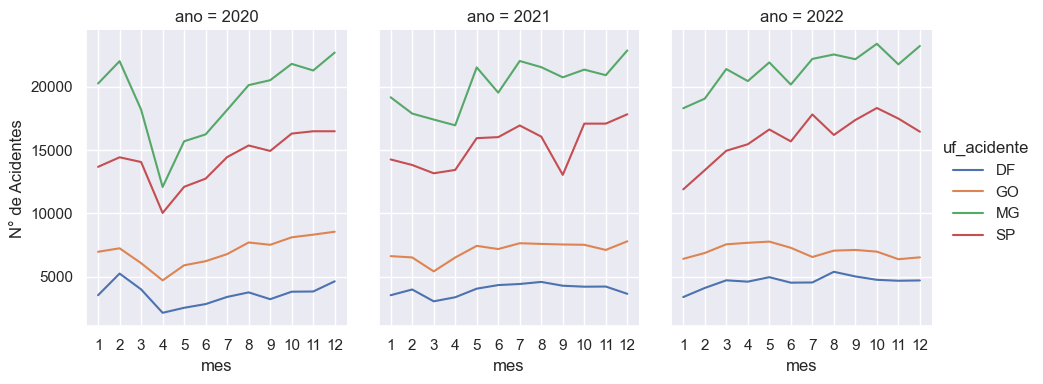

In [22]:

dff = filtered.groupby(['ano', 'mes', 'uf_acidente'])['qtde_acidente'].agg([np.sum])
dff = dff.reset_index()

plt.figure(figsize=(12,15))
sns.set()
fig1 = sns.relplot(
    kind='line',
    data=dff,
    y='sum',
    x='mes',
    hue='uf_acidente',aspect = .8,
    col='ano', col_wrap = len(dff['ano'].unique()) , height = 4)
fig1.set(ylabel = 'Quantidade de Acidents')
months_in_data = dff['mes'].unique()
plt.xticks(ticks=months_in_data, labels=months_in_data)

fig1.set_axis_labels(y_var='N° de Acidentes')
plt.show()


In [23]:
x = (datag['qtde_acidente'].sum())
y = (datag['qtde_acid_com_obitos'].sum())

print("porcentagem de acidentes com morte em todo brasil:", 100*(y/x),'%')

porcentagem de acidentes com morte em todo brasil: 2.0733760595551445 %


In [24]:
x = filtered['qtde_acidente'].sum()
y = filtered['qtde_acid_com_obitos'].sum()

print("porcentagem de acidentes com morte nas UF'S selecionadas:", 100*(y/x),'%')

porcentagem de acidentes com morte nas UF'S selecionadas: 1.3053037368947147 %


      dia_semana  qtde_acidente
0        DOMINGO         207709
1   QUARTA-FEIRA         232489
2   QUINTA-FEIRA         236888
3         SABADO         259918
4  SEGUNDA-FEIRA         235632


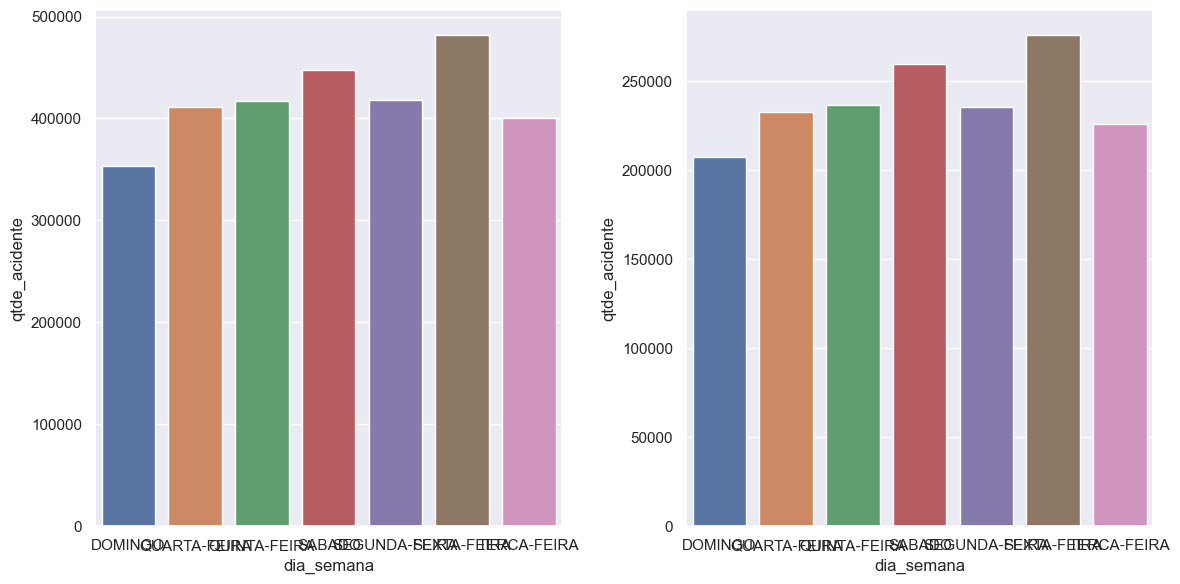

In [32]:
byday1 = filtered.groupby('dia_semana')['qtde_acidente'].sum().reset_index()

byday2 = datag.groupby('dia_semana')['qtde_acidente'].sum().reset_index()
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

sns.barplot(x = 'dia_semana', y = 'qtde_acidente', data = byday2, ax = axes[0])

sns.barplot(x = 'dia_semana', y = 'qtde_acidente', data = byday1, ax = axes[1])
plt.tight_layout()
plt.show()